참고 자료
*   텐서플로우 튜토리얼 (https://www.tensorflow.org/tutorials/)
*   머신 러닝 교과서 with 파이썬, 사이킷런, 텐서플로 개정 3판 (https://github.com/gilbutITbook/080223)
*   핸즈온 머신러닝 2판 (https://github.com/rickiepark/handson-ml2)
*   케라스 창시자에게 배우는 딥러닝 (https://github.com/rickiepark/deep-learning-with-python-notebooks/tree/tf2)


In [13]:
from IPython.display import Image
import sys
import gzip
import shutil
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

# [1] 다층 퍼셉트론으로 손글씨 숫자 분류

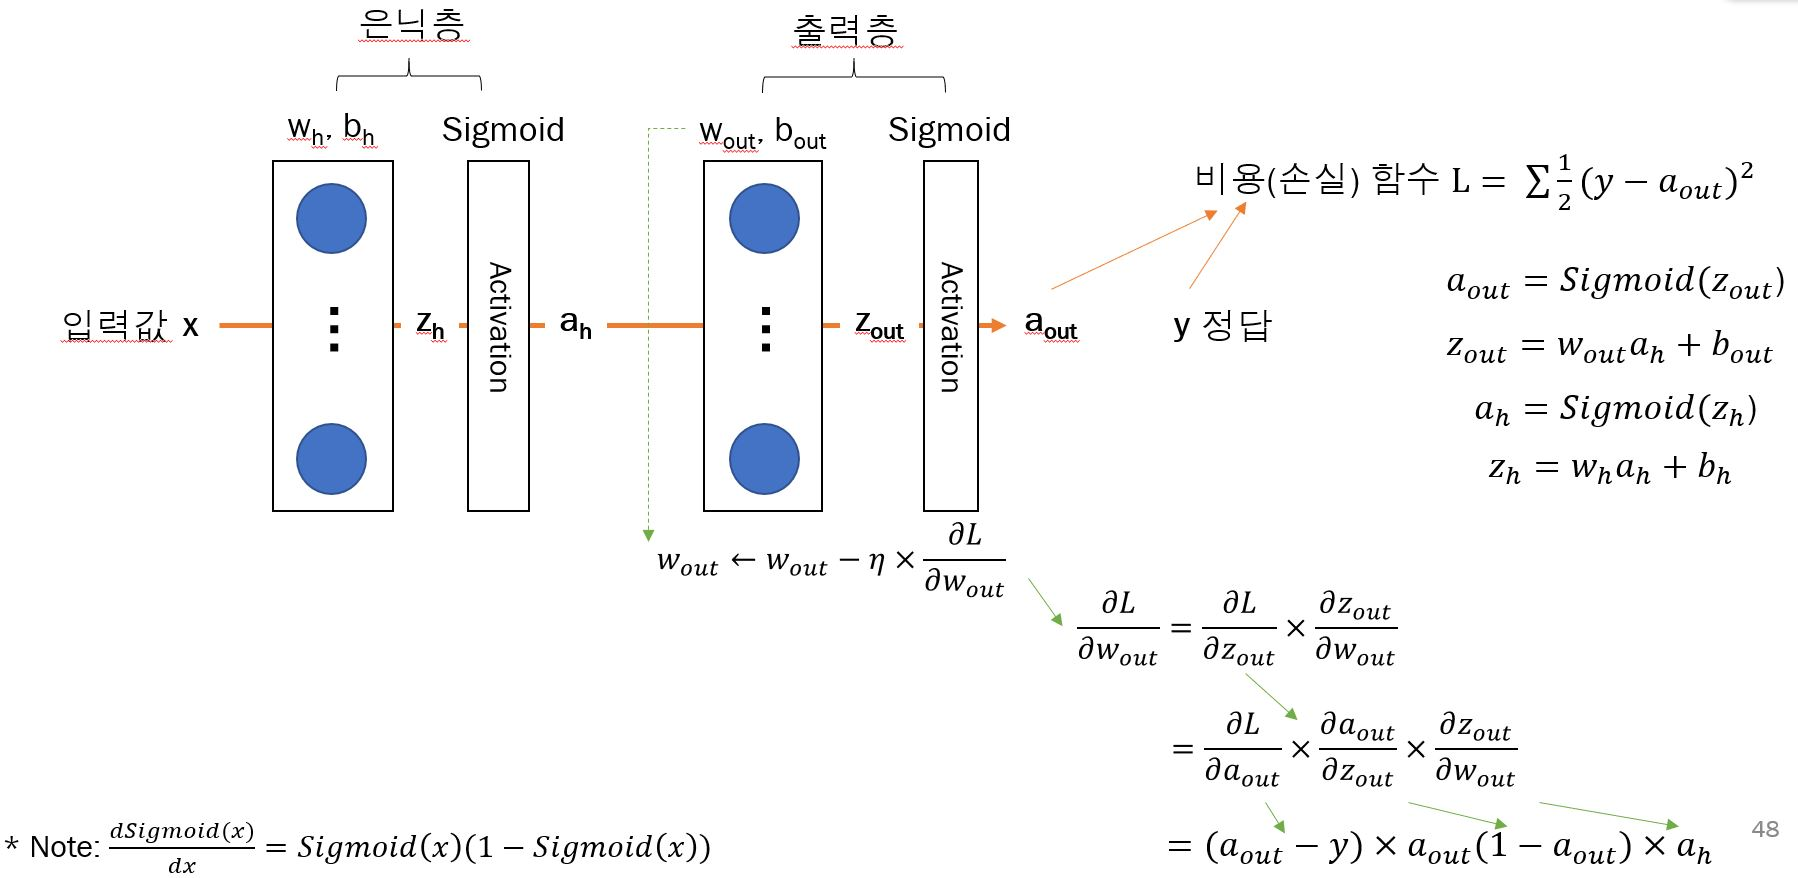

## 2.1. MNIST 데이터셋 로딩

MNIST 데이터셋: http://yann.lecun.com/exdb/mnist/

- 훈련 세트 이미지: train-images-idx3-ubyte.gz (9.9MB, 압축 해제 후 47MB, 60,000개 샘플)
- 훈련 세트 레이블: train-labels-idx1-ubyte.gz (29KB, 압축 해제 후 60KB, 60,000개 레이블)
- 테스트 세트 이미지: t10k-images-idx3-ubyte.gz (1.6MB, 압축 해제 후 7.8MB, 10,000개 샘플)
- 테스트 세트 레이블: t10k-labels-idx1-ubyte.gz (5KB, 압축 해제 후 10KB, 10,000개 레이블)


In [ ]:
# MNIST 데이터셋 다운로드
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch12/train-images-idx3-ubyte.gz
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch12/train-labels-idx1-ubyte.gz
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch12/t10k-images-idx3-ubyte.gz
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch12/t10k-labels-idx1-ubyte.gz

--2021-07-01 01:12:40--  https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch12/train-images-idx3-ubyte.gz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch12/train-images-idx3-ubyte.gz [following]
--2021-07-01 01:12:40--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch12/train-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[==

In [ ]:
# MNIST 데이터 압축 풀기

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir() if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read()) 

In [ ]:
# 데이터 확인
!ls

sample_data		   train-images-idx3-ubyte
t10k-images-idx3-ubyte	   train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz  train-labels-idx1-ubyte
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz


In [ ]:
# MNIST 데이터 로딩하는 함수 선언
 
def load_mnist(path, kind='train'):
    """`path`에서 MNIST 데이터 불러오기"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels

In [ ]:
# 훈련 데이터 로딩
X_train, y_train = load_mnist('', kind='train')
print(X_train.shape)
print('행: %d, 열: %d' % (X_train.shape[0], X_train.shape[1]))
print(y_train.shape)

(60000, 784)
행: 60000, 열: 784
(60000,)


In [ ]:
# 테스트 데이터 로딩
X_test, y_test = load_mnist('', kind='t10k')
print(X_test.shape)
print('행: %d, 열: %d' % (X_test.shape[0], X_test.shape[1]))

(10000, 784)
행: 10000, 열: 784


## 2.2. MNIST 데이터 이미지로 띄워보기

각 클래스 (0, 1, 2, ... ,9)별 이미지 띄워보기

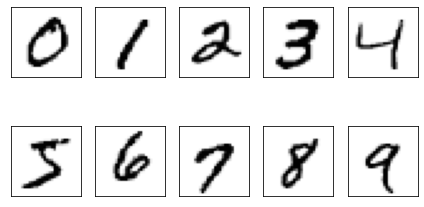

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28) # (784,)를 (28,28)로 변환
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

숫자 7의 샘플 이미지 25개 띄워보기

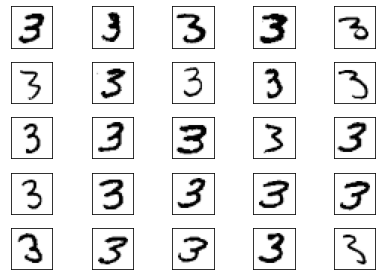

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 3][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

In [ ]:
# MNIST 로딩 후 파일로 저장해서 간편하게 불러오기 (필요시 사용)
np.savez_compressed('mnist_scaled.npz', 
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

mnist = np.load('mnist_scaled.npz')

X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train', 
                                    'X_test', 'y_test']]

del mnist

X_train.shape

(60000, 784)

## 2.3. 다층 퍼셉트론 구현

###2.3.1. 원핫 인코딩

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
n_classes = 10
input_data = y_train[:5]
onehot = np.zeros((n_classes, input_data.shape[0]))
print(input_data)
print(onehot)

[5 0 4 1 9]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
for idx, val in enumerate(input_data.astype(int)):
    onehot[val, idx] = 1.

print(input_data)
print(onehot)

[5 0 4 1 9]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
print(X_train[:5])
print(X_train[:5].shape)
print()
print(onehot.T) #input의 형태에 맞게 tranpose
print(onehot.T.shape)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
(5, 784)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(5, 10)


### 2.3.2. 시그모이드 활성화 함수

In [ ]:
Image(url='https://t1.daumcdn.net/cfile/tistory/275BAD4F577B669920')

In [ ]:
def sigmoid(z):
  return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

In [ ]:
input_data = np.random.uniform(high=50,low=-50,size=10)
print(input_data)

[ 33.50984332  11.76329287  13.82849749 -49.98982078 -39.8069732
 -12.96356563 -24.47551898   2.2322261   29.72019514  -8.47759919]


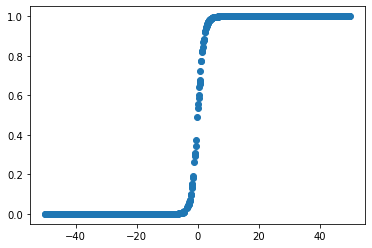

In [ ]:
input_data = np.random.uniform(high=50,low=-50,size=1000)
plt.scatter(input_data,sigmoid(input_data))

### 2.3.3. 가중치 초기화

In [ ]:
n_output = 10 # 클래스 레이블의 수
n_features = X_train.shape[1] # 피쳐의 수
n_hidden = 5 # 은닉층의 크기

# 입력층 -> 은닉층('h'idden) 사이의 가중치
b_h = np.zeros(n_hidden)
w_h = np.random.normal(loc=0.0, scale=0.1, size=(n_features, n_hidden))

# 은닉층(h) -> 출력층('out'put) 사이의 가중치
b_out = np.zeros(n_output)
w_out = np.random.normal(loc=0.0, scale=0.1, size=(n_hidden, n_output))

In [ ]:
print("b_h:", b_h, "shape:", b_h.shape)
print()
print("w_h:", w_h, "shape:", w_h.shape)
print()
print()
print("b_out:", b_out, "shape:", b_out.shape)
print()
print("w_out:", w_out, "shape:", w_out.shape)

b_h: [0. 0. 0. 0. 0.] shape: (5,)

w_h: [[ 0.07311359  0.07442324 -0.09826287  0.08184429  0.09335664]
 [-0.07572469 -0.11093321 -0.01246122 -0.01374763  0.00995132]
 [ 0.16920852 -0.02002841 -0.12462324  0.09500996 -0.00275512]
 ...
 [ 0.03135778 -0.02926788  0.12447747 -0.14112777 -0.08695365]
 [ 0.08331217 -0.03720177 -0.01244955 -0.03594762  0.02535634]
 [ 0.01346559 -0.03199916  0.05465449 -0.05128382  0.00565134]] shape: (784, 5)


b_out: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] shape: (10,)

w_out: [[ 0.04047866  0.05475013 -0.01415592 -0.00950323 -0.07581757  0.0884825
   0.00992682 -0.05207327 -0.02940355  0.0290311 ]
 [-0.00402157  0.0129445   0.01541157  0.00665319  0.02433774 -0.14435275
   0.16296268 -0.07533459  0.14372186  0.02384387]
 [-0.07837082 -0.15878157  0.02916413  0.06071377 -0.16798854  0.06022159
  -0.03532538  0.03334671 -0.18351642  0.08128659]
 [-0.1093424  -0.07616498  0.05199408  0.0669559   0.04946536 -0.11346388
   0.05120803 -0.03208293  0.01505409  0.01609898]

### 2.3.4. 순방향(feedforward) 계산

In [ ]:
input_data = X_train[:5]
input_data

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [ ]:
# 단계 1: 입력 데이터 -> 은닉층 가중치 연산
z_h = np.dot(input_data, w_h) + b_h
print(z_h)

[[-2.28639977 -0.2822987  -3.24997579 -1.38998923  0.49207941]
 [-3.02397358  0.94014908 -4.86968124 -3.17060131 -0.10912585]
 [-1.16445917 -0.97402209 -2.66793318 -3.77414147 -2.92653366]
 [-3.80585053  2.7800733  -3.73393902 -2.65477295 -0.60729694]
 [-1.88718741 -0.48713273 -6.93273417 -2.89993025 -0.75405617]]


In [ ]:
# 단계 2: 은닉층 활성화 출력
a_h = sigmoid(z_h)
print(a_h)

[[0.09225561 0.42989031 0.03732776 0.19940948 0.62059617]
 [0.0463545  0.71912977 0.00761734 0.04028716 0.47274558]
 [0.23785798 0.27407954 0.06489227 0.0224416  0.05085739]
 [0.0217564  0.94158948 0.02334071 0.06569544 0.35267605]
 [0.13156549 0.38056926 0.00097438 0.05215701 0.31993812]]


In [ ]:
# 단계 3: 은닉층의 출력 데이터 -> 출력층의 가중치 연산
z_out = np.dot(a_h, w_out) + b_out
print(z_out)

[[-0.0762808  -0.05726976  0.05160463  0.05866308  0.05437419 -0.02662446
   0.09354467 -0.08305044  0.07809112 -0.02056317]
 [-0.04681536 -0.02805919  0.03927459  0.03878312  0.05074187 -0.06752421
   0.12986632 -0.08863736  0.11861978 -0.01050917]
 [-0.0034025   0.00072481  0.00677043  0.00837051 -0.01727715 -0.01325169
   0.04700383 -0.03492574  0.02270036  0.0158202 ]
 [-0.04235423 -0.02190921  0.03809246  0.03520841  0.04748263 -0.11296774
   0.16397371 -0.09653028  0.14438811  0.00345612]
 [-0.02959467 -0.01610951  0.0246983   0.02600177  0.02609494 -0.02459101
   0.07301357 -0.05814822  0.06322293 -0.00667275]]


In [ ]:
# 단계 4: 출력층 활성화 출력
a_out = sigmoid(z_out)
print(a_out)

[[0.48093904 0.48568647 0.51289829 0.51466157 0.5135902  0.49334428
  0.52336913 0.47924932 0.51951286 0.49485939]
 [0.4882983  0.49298566 0.50981739 0.50969456 0.51268275 0.48312536
  0.53242103 0.47785516 0.52962022 0.49737273]
 [0.49914938 0.5001812  0.5016926  0.50209262 0.49568082 0.49668713
  0.51174879 0.49126945 0.50567485 0.50395497]
 [0.48941302 0.49452292 0.50952196 0.50880119 0.51186843 0.47178806
  0.54090182 0.47588615 0.53603444 0.50086403]
 [0.49260187 0.49597271 0.50617426 0.50650008 0.50652336 0.49385256
  0.51824529 0.48546704 0.51580047 0.49833182]]


In [ ]:
a_out[1]

array([0.4882983 , 0.49298566, 0.50981739, 0.50969456, 0.51268275,
       0.48312536, 0.53242103, 0.47785516, 0.52962022, 0.49737273])

In [ ]:
y_train[1]

0

### 2.3.5. 비용 함수 계산

In [ ]:
y_encoded = onehot.T
print(y_encoded)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
y_predicted = a_out
print(y_predicted)

[[0.48093904 0.48568647 0.51289829 0.51466157 0.5135902  0.49334428
  0.52336913 0.47924932 0.51951286 0.49485939]
 [0.4882983  0.49298566 0.50981739 0.50969456 0.51268275 0.48312536
  0.53242103 0.47785516 0.52962022 0.49737273]
 [0.49914938 0.5001812  0.5016926  0.50209262 0.49568082 0.49668713
  0.51174879 0.49126945 0.50567485 0.50395497]
 [0.48941302 0.49452292 0.50952196 0.50880119 0.51186843 0.47178806
  0.54090182 0.47588615 0.53603444 0.50086403]
 [0.49260187 0.49597271 0.50617426 0.50650008 0.50652336 0.49385256
  0.51824529 0.48546704 0.51580047 0.49833182]]


In [ ]:
cost = 0.5 * (y_predicted-y_encoded)*(y_predicted-y_encoded)
print(cost)

[[0.11565118 0.11794567 0.13153233 0.13243826 0.13188745 0.12835001
  0.13695762 0.11483995 0.13494681 0.12244291]
 [0.13091932 0.12151743 0.12995688 0.12989427 0.1314218  0.11670506
  0.14173608 0.11417278 0.14024879 0.12368982]
 [0.12457505 0.12509062 0.12584773 0.1260485  0.12716892 0.12334905
  0.13094341 0.12067284 0.12785353 0.1269853 ]
 [0.11976255 0.12775354 0.12980632 0.12943933 0.13100464 0.11129199
  0.14628739 0.11323381 0.14366646 0.12543239]
 [0.1213283  0.12299446 0.12810619 0.12827116 0.12828296 0.12194517
  0.13428909 0.11783912 0.13302506 0.12583548]]


In [ ]:
print(cost.sum(axis=1))
total_cost = cost.sum()
print(total_cost)

[1.2669922  1.28026222 1.25853495 1.27767842 1.26191701]
6.345384801206678


### 2.3.6. 역전파를 통한 가중치 갱신

In [ ]:
#그래디언트 계산
grad_a_out = a_out - y_encoded
grad_z_out = grad_a_out * (a_out * (1. - a_out)) 

grad_w_out = np.dot(a_h.T, grad_z_out)
grad_b_out = np.sum(grad_z_out, axis=0)

grad_a_h = np.dot(grad_z_out, w_out.T)
grad_z_h =  grad_a_h * (a_h * (1. - a_h))

grad_w_h = np.dot(input_data.T, grad_z_h)
grad_b_h = np.sum(grad_z_h, axis=0)

In [ ]:
print(w_h)
print(b_h)
print(w_out)
print(b_out)

[[ 0.07311359  0.07442324 -0.09826287  0.08184429  0.09335664]
 [-0.07572469 -0.11093321 -0.01246122 -0.01374763  0.00995132]
 [ 0.16920852 -0.02002841 -0.12462324  0.09500996 -0.00275512]
 ...
 [ 0.03135778 -0.02926788  0.12447747 -0.14112777 -0.08695365]
 [ 0.08331217 -0.03720177 -0.01244955 -0.03594762  0.02535634]
 [ 0.01346559 -0.03199916  0.05465449 -0.05128382  0.00565134]]
[0. 0. 0. 0. 0.]
[[ 0.04047866  0.05475013 -0.01415592 -0.00950323 -0.07581757  0.0884825
   0.00992682 -0.05207327 -0.02940355  0.0290311 ]
 [-0.00402157  0.0129445   0.01541157  0.00665319  0.02433774 -0.14435275
   0.16296268 -0.07533459  0.14372186  0.02384387]
 [-0.07837082 -0.15878157  0.02916413  0.06071377 -0.16798854  0.06022159
  -0.03532538  0.03334671 -0.18351642  0.08128659]
 [-0.1093424  -0.07616498  0.05199408  0.0669559   0.04946536 -0.11346388
   0.05120803 -0.03208293  0.01505409  0.01609898]
 [-0.08629933 -0.07536383  0.05612114  0.06616496  0.07623799  0.07677491
   0.02204339 -0.06559483 

In [ ]:
# 규제와 가중치 업데이트
learning_rate = 0.1

w_h -= learning_rate * grad_w_h 
b_h -= learning_rate * grad_b_h

w_out -= learning_rate * grad_w_out
b_out -= learning_rate * grad_b_out

In [ ]:
print(w_h)
print(b_h)
print(w_out)
print(b_out)

[[ 0.07333447  0.077206   -0.09854381  0.082203    0.09478343]
 [-0.07550381 -0.10815045 -0.01274216 -0.01338892  0.01137812]
 [ 0.1694294  -0.01724565 -0.12490419  0.09536867 -0.00132833]
 ...
 [ 0.03157867 -0.02648512  0.12419653 -0.14076906 -0.08552685]
 [ 0.08353306 -0.03441901 -0.01273049 -0.03558891  0.02678313]
 [ 0.01368647 -0.0292164   0.05437355 -0.05092511  0.00707813]]
[-0.00022088 -0.00278276  0.00028094 -0.00035871 -0.0014268 ]
[[ 0.03510959  0.04872905 -0.02085357 -0.0162076  -0.07654029  0.08425831
   0.003072   -0.05850345 -0.03620299  0.02569457]
 [-0.01960972  0.00261935 -0.01950144 -0.02826498 -0.00379457 -0.16675588
   0.12674225 -0.10820675  0.10773925 -0.00088571]
 [-0.07982881 -0.15985691  0.02746534  0.0590132  -0.16805778  0.05951022
  -0.03706956  0.03172382 -0.18524496  0.07963257]
 [-0.11294708 -0.07917788  0.04714768  0.06210184  0.04517321 -0.11311946
   0.04622639 -0.03663612  0.01010522  0.01268012]
 [-0.0965929  -0.0888648   0.03296921  0.04299171  0.0

In [ ]:
#갱신된 가중치로 순방향 계산
z_h = np.dot(input_data, w_h) + b_h
a_h = sigmoid(z_h)
z_out = np.dot(a_h, w_out) + b_out
a_out = sigmoid(z_out)

In [ ]:
#비용 재확인 및 비교
y_predicted = a_out
cost = 0.5 * (y_predicted-y_encoded)*(y_predicted-y_encoded)
total_cost = cost.sum()
print(total_cost)

5.960477762455646


### 2.3.7. 에폭과 미니배치 

In [ ]:
#데이터셋의 인덱스(순서 번호)
np.arange(X_train.shape[0])

array([    0,     1,     2, ..., 59997, 59998, 59999])

In [ ]:
input_data = X_train[:100]
epoch_size = 2 #전체 데이터셋을 몇 번 반복하여 학습할 것인가?
minibatch_size = 20 #한번 학습시(순방향 계산/역전파) 몇 개의 데이터를 사용할 것인가?

# 훈련 에폭 반복
for i in range(epoch_size):
    indices = np.arange(input_data.shape[0])
    print("Epoch: ",i)

    # 미니 배치 반복 (이터레이션)
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        #print(start_idx)
        #print(start_idx+minibatch_size)
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        print(" Minibatch indices:",batch_idx)
        minibatch = input_data[batch_idx]

Epoch:  0
 Minibatch indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 Minibatch indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 Minibatch indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 Minibatch indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 Minibatch indices: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Epoch:  1
 Minibatch indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 Minibatch indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 Minibatch indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 Minibatch indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 Minibatch indices: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


## 2.4. 다층 퍼셉트론 모델 및 실험

### 2.4.1. 다층 퍼셉트론 클래스

In [ ]:
class NeuralNetMLP(object):
    """피드포워드 신경망 / 다층 퍼셉트론 분류기

    매개변수

    ------------
    n_hidden : int (기본값: 30)
        은닉 유닛 개수
    epochs : int (기본값: 100)
        훈련 세트를 반복할 횟수
    learning_rate : float (기본값: 0.001)
        학습률
    minibatch_size : int (기본값: 1)
        미니 배치의 훈련 샘플 개수
    seed : int (기본값: None)
        가중치와 데이터 셔플링을 위한 난수 초깃값

    속성
    -----------
    eval_ : dict
      훈련 에포크마다 비용, 훈련 정확도, 검증 정확도를 수집하기 위한 딕셔너리

    """
    def __init__(self, n_hidden=30,
                 epochs=100, learning_rate=0.001,
                 minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """레이블을 원-핫 방식으로 인코딩합니다

        매개변수
        ------------
        y : 배열, 크기 = [n_samples]
            타깃 값.
        n_classes : int
            클래스 개수

        반환값
        -----------
        onehot : 배열, 크기 = (n_samples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """로지스틱 함수(시그모이드)를 계산합니다"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """순방향 계산을 수행합니다"""

        # 단계 1: 은닉층의 최종 입력
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # 단계 2: 은닉층의 활성화 출력
        a_h = self._sigmoid(z_h)

        # 단계 3: 출력층의 최종 입력
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]
        z_out = np.dot(a_h, self.w_out) + self.b_out

        # 단계 4: 출력층의 활성화 출력
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """비용 함수를 계산합니다

        매개변수
        ----------
        y_enc : 배열, 크기 = (n_samples, n_labels)
            원-핫 인코딩된 클래스 레이블
        output : 배열, 크기 = [n_samples, n_output_units]
            출력층의 활성화 출력 (정방향 계산)

        반환값
        ---------
        cost : float
            비용

        """
        cost = 0.5 * (output-y_enc) * (output-y_enc)
        return cost.sum()

    def predict(self, X):
        """클래스 레이블을 예측합니다

        매개변수
        -----------
        X : 배열, 크기 = [n_samples, n_features]
            원본 특성의 입력층

        반환값:
        ----------
        y_pred : 배열, 크기 = [n_samples]
            예측된 클래스 레이블

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """훈련 데이터에서 가중치를 학습합니다

        매개변수
        -----------
        X_train : 배열, 크기 = [n_samples, n_features]
            원본 특성의 입력층
        y_train : 배열, 크기 = [n_samples]
            타깃 클래스 레이블
        X_valid : 배열, 크기 = [n_samples, n_features]
            훈련하는 동안 검증에 사용할 샘플 특성
        y_valid : 배열, 크기 = [n_samples]
            훈련하는 동안 검증에 사용할 샘플 레이블

        반환값:
        ----------
        self

        """
        n_output = 10  # 클래스 레이블의 수
        n_features = X_train.shape[1] # 피처의 수

        ########################
        # 가중치 초기화

        # 입력층 -> 은닉층 사이의 가중치
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # 은닉층 -> 출력층 사이의 가중치
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))
        ########################

        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # 훈련 에폭 반복
        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])

            # 미니 배치 반복 (이터레이션)
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # 순방향 계산
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ###############################
                # 역전파를 통해 가중치 갱신
                # dSigmoid(x)/dx = sigmoid(x)(1-sigmoid(x))

                grad_a_out = a_out - y_train_enc[batch_idx]
                grad_z_out = grad_a_out * (a_out * (1. - a_out)) 

                grad_w_out = np.dot(a_h.T, grad_z_out)
                grad_b_out = np.sum(grad_z_out, axis=0)

                grad_a_h = np.dot(grad_z_out, self.w_out.T)
                grad_z_h =  grad_a_h * (a_h * (1. - a_h))

                grad_w_h = np.dot(X_train[batch_idx].T, grad_z_h)
                grad_b_h = np.sum(grad_z_h, axis=0)


                # 규제와 가중치 업데이트
                self.w_h -= self.learning_rate * grad_w_h
                self.b_h -= self.learning_rate * grad_b_h
 
                self.w_out -= self.learning_rate * grad_w_out
                self.b_out -= self.learning_rate * grad_b_out
                ###############################


            ##########################
            # 매 에폭마다 평가
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc, output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) / X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) / X_valid.shape[0])

            print('Epoch: %i / %d | 비용: %.2f | 훈련/검증 정확도: %.2f%%/%.2f%% ' %
                             (i+1, self.epochs, cost, train_acc*100, valid_acc*100))

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)
            ##########################

        return self

### 2.4.2. 다층 퍼셉트론 실험

In [ ]:
# 모델 정의
nn = NeuralNetMLP(n_hidden=100, 
                  epochs=400, 
                  learning_rate=0.01,
                  minibatch_size=200, 
                  seed=1)

In [ ]:
# 모델 학습 진행
nn.fit(X_train=X_train[:11000], 
       y_train=y_train[:11000],
       X_valid=X_train[11000:22000],
       y_valid=y_train[11000:22000])

Epoch: 1 / 110 | 비용: 5477.24 | 훈련/검증 정확도: 10.15%/9.55% 
Epoch: 2 / 110 | 비용: 4753.05 | 훈련/검증 정확도: 20.76%/20.50% 
Epoch: 3 / 110 | 비용: 4438.14 | 훈련/검증 정확도: 26.64%/25.99% 
Epoch: 4 / 110 | 비용: 4010.00 | 훈련/검증 정확도: 35.69%/35.11% 
Epoch: 5 / 110 | 비용: 3327.62 | 훈련/검증 정확도: 46.12%/44.73% 
Epoch: 6 / 110 | 비용: 3081.69 | 훈련/검증 정확도: 49.00%/47.87% 
Epoch: 7 / 110 | 비용: 3143.71 | 훈련/검증 정확도: 47.37%/45.81% 
Epoch: 8 / 110 | 비용: 3088.00 | 훈련/검증 정확도: 49.25%/47.87% 
Epoch: 9 / 110 | 비용: 2804.21 | 훈련/검증 정확도: 56.20%/55.10% 
Epoch: 10 / 110 | 비용: 2638.56 | 훈련/검증 정확도: 57.44%/56.17% 
Epoch: 11 / 110 | 비용: 2195.90 | 훈련/검증 정확도: 66.39%/64.36% 
Epoch: 12 / 110 | 비용: 1704.07 | 훈련/검증 정확도: 75.40%/73.34% 
Epoch: 13 / 110 | 비용: 1602.74 | 훈련/검증 정확도: 75.96%/74.08% 
Epoch: 14 / 110 | 비용: 1548.78 | 훈련/검증 정확도: 76.44%/74.55% 
Epoch: 15 / 110 | 비용: 1510.11 | 훈련/검증 정확도: 76.79%/74.90% 
Epoch: 16 / 110 | 비용: 1355.18 | 훈련/검증 정확도: 83.82%/81.65% 
Epoch: 17 / 110 | 비용: 1191.19 | 훈련/검증 정확도: 84.57%/82.04% 
Epoch: 18 / 110 | 비용: 11

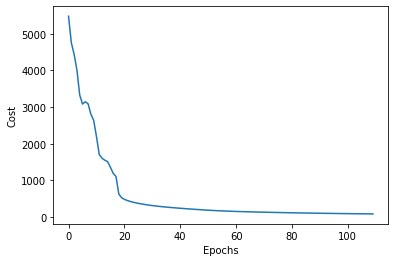

In [ ]:
#학습에 따른 비용 출력
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
# plt.savefig('images/12_07.png', dpi=300)
plt.show()

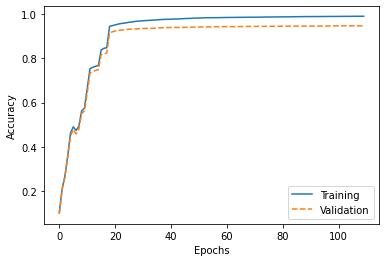

In [ ]:
#학습에 따른 훈련 정확도와 검증 정확도 비교

plt.plot(range(nn.epochs), nn.eval_['train_acc'], 
         label='Training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], 
         label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
# plt.savefig('images/12_08.png', dpi=300)
plt.show()

In [ ]:
# 훈련된 모델로 테스트 정확도 확인
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred)
       .astype(np.float) / X_test.shape[0])

print('테스트 정확도: %.2f%%' % (acc * 100))

테스트 정확도: 95.06%


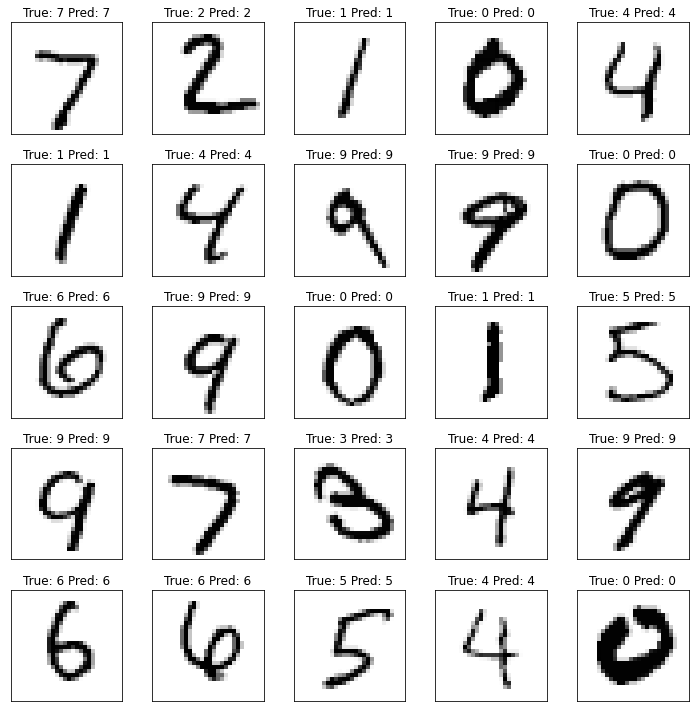

In [ ]:
#실제 이미지 분류 결과 확인 (맞는 경우)

cl_img = X_test[y_test == y_test_pred][:25]
correct_lab = y_test[y_test == y_test_pred][:25]
cl_lab = y_test_pred[y_test == y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
ax = ax.flatten()
for i in range(25):
    img = cl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('True: %d Pred: %d' % ( correct_lab[i], cl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_09.png', dpi=300)
plt.show()

In [ ]:
X_train[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

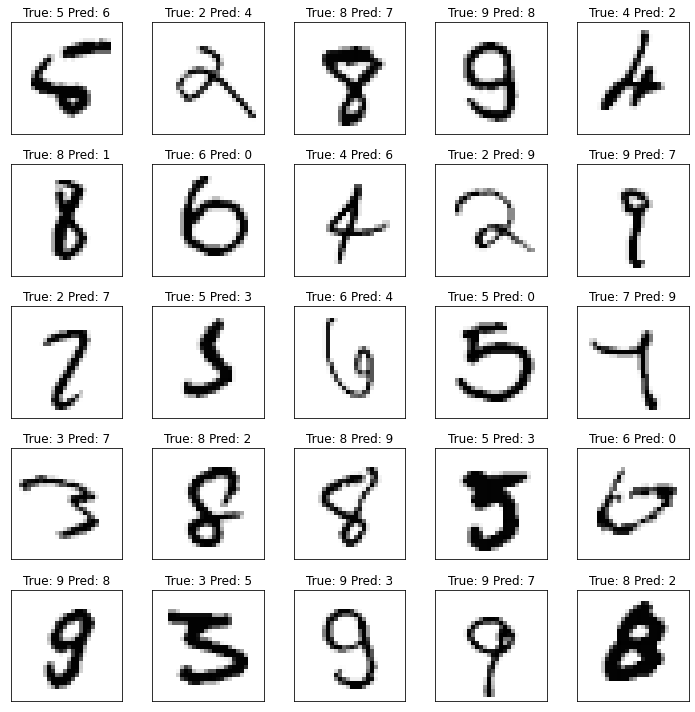

In [ ]:
#실제 이미지 분류 결과 확인 (틀린 경우)

miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('True: %d Pred: %d' % (correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_09.png', dpi=300)
plt.show()

# [2] 텐서플로우, 케라스 알아보기

## 2.1. 텐서플로 객체

In [ ]:
import tensorflow as tf

텐서(다차원 배열, 매트릭스) 상수

In [ ]:
x = 42

In [ ]:
print(x)

42


In [ ]:
# 스칼라
x = tf.constant(42)
print(x)

tf.Tensor(42, shape=(), dtype=int32)


In [ ]:
1

1

In [ ]:
1.

1.0

In [ ]:
1.0

1.0

In [ ]:
# 행렬
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [ ]:
x.shape

TensorShape([2, 3])

In [ ]:
x.dtype

tf.float32

In [ ]:
#인덱싱
print(x[1,1])

tf.Tensor(5.0, shape=(), dtype=float32)


In [ ]:
print(x[1:, :])

tf.Tensor([[4. 5. 6.]], shape=(1, 3), dtype=float32)


In [ ]:
print(x[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [ ]:
print(x[1:, 1:])

tf.Tensor([[5. 6.]], shape=(1, 2), dtype=float32)


In [ ]:
#연산
print(x + 10)

tf.Tensor(
[[11. 12. 13.]
 [14. 15. 16.]], shape=(2, 3), dtype=float32)


In [ ]:
print(tf.square(x))

tf.Tensor(
[[ 1.  4.  9.]
 [16. 25. 36.]], shape=(2, 3), dtype=float32)


In [ ]:
print(tf.transpose(x))

tf.Tensor(
[[1. 4.]
 [2. 5.]
 [3. 6.]], shape=(3, 2), dtype=float32)


In [ ]:
tf.matmul(x,tf.transpose(x))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

텐서 변수 - 모델 파라미터를 저장하고 업데이트하기 위해 사용

In [ ]:
a = tf.Variable(initial_value=3.14, name='var_a')
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
c = tf.Variable(initial_value=[True, False], name='var_c')
d = tf.Variable(initial_value='abc', name='var_d')
print(a)
print(b)
print(c)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'var_c:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'var_d:0' shape=() dtype=string, numpy=b'abc'>


In [ ]:
#학습가능
a.trainable

True

In [ ]:
w = tf.Variable([1, 2, 3], trainable=False)

print(w.trainable)

False


In [ ]:
#초기화
w = tf.Variable(tf.random.uniform((3, 3)))
print(w)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[0.52445745, 0.79187524, 0.41823626],
       [0.09780312, 0.23772502, 0.41103482],
       [0.5956044 , 0.7498385 , 0.41010427]], dtype=float32)>


In [ ]:
def compute_z(x):    
    return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[3.36291671]
 [1.80635762]
 [3.32559419]]


## 2.2. 자동 미분과 GradientTape을 사용해 그래디언트 계산

### 2.2.1. 훈련 가능한 변수에 대한 손실의 그래디언트 계산

In [ ]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

True True


In [ ]:
x = tf.constant([1.4])
y = tf.constant([2.1])

In [ ]:
with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw,dloss_db = tape.gradient(loss, [w,b])

In [ ]:
tf.print('dL/dw:', dloss_dw)
tf.print('dL/db:', dloss_db)

dL/dw: -0.559999764
dL/db: -0.399999857


In [ ]:
# 계산된 그래디언트 확인
tf.print(2*x * ((w*x + b) - y))
tf.print(2*((w*x + b) - y))

[-0.559999764]
[-0.399999857]


### 2.2.2. 훈련하지 않는 변수에 대한 그레이디언트 계산

In [ ]:
with tf.GradientTape() as tape:
    tape.watch(x) #훈련하지 않는 텐서 모니터링
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dx = tape.gradient(loss, x)

tf.print('dL/dx:', dloss_dx)

dL/dx: [-0.399999857]


In [ ]:
# 계산된 그래언트 확인
tf.print(2*w * ((w*x + b) - y))

[-0.399999857]


### 2.2.4. 변수 업데이트

In [ ]:
tf.print('기존 w:', w)
tf.print('기존 b:', b)

기존 w: 1
기존 b: 0.5


In [ ]:
w.assign_sub(0.1 * dloss_dw)
b.assign_sub(0.1 * dloss_db)

tf.print('업데이트된 w:', w)
tf.print('업데이트된 b:', b)

업데이트된 w: 1.056
업데이트된 b: 0.539999962


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('업데이트된 w:', w)
tf.print('업데이트된 b:', b)

업데이트된 w: 1.112
업데이트된 b: 0.579999924


## 2.3. 텐서플로우로 선형 회귀 모델 구현

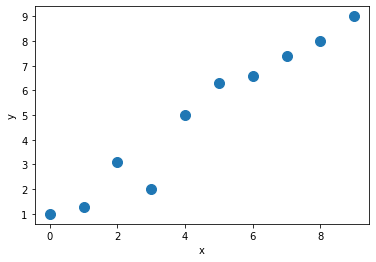

In [ ]:
#데이터 생성
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig('images/13_5.png', dpi=300)
plt.show()

In [ ]:
#텐서플로우 데이터셋으로 변환
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))

In [ ]:
#모델 생성
class MyModel: 
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def __call__(self, x):
        return self.w*x + self.b

In [ ]:
model = MyModel()

In [ ]:
model.w

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=0.0>

In [ ]:
model.b

<tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.0>

In [ ]:
#손실 함수 정의
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [ ]:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

tf.print(loss_fn(yt, yp))

0.25


In [ ]:
#훈련 함수 정의
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [ ]:
#학습
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs, Ls = [], [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%steps_per_epoch==0:
        Ws.append(model.w.numpy())
        bs.append(model.b.numpy())
        Ls.append(loss_val.numpy())
        print('에폭 {:3d} 스텝 {:4d} 손실 {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))

에폭   0 스텝    0 손실 4.0000
에폭   1 스텝   10 손실 24.1152
에폭   2 스텝   20 손실 74.6139
에폭   3 스텝   30 손실 1.4465
에폭   4 스텝   40 손실 8.4031
에폭   5 스텝   50 손실 33.4219
에폭   6 스텝   60 손실 43.1618
에폭   7 스텝   70 손실 33.2272
에폭   8 스텝   80 손실 0.7966
에폭   9 스텝   90 손실 0.7749
에폭  10 스텝  100 손실 36.8361
에폭  11 스텝  110 손실 51.5090
에폭  12 스텝  120 손실 26.3877
에폭  13 스텝  130 손실 47.4255
에폭  14 스텝  140 손실 15.2064
에폭  15 스텝  150 손실 0.6588
에폭  16 스텝  160 손실 41.8925
에폭  17 스텝  170 손실 5.5037
에폭  18 스텝  180 손실 0.8529
에폭  19 스텝  190 손실 0.5954
에폭  20 스텝  200 손실 0.5782
에폭  21 스텝  210 손실 4.8527
에폭  22 스텝  220 손실 22.9199
에폭  23 스텝  230 손실 4.5605
에폭  24 스텝  240 손실 0.5228
에폭  25 스텝  250 손실 22.4745
에폭  26 스텝  260 손실 21.5418
에폭  27 스텝  270 손실 0.2645
에폭  28 스텝  280 손실 3.9128
에폭  29 스텝  290 손실 3.7966
에폭  30 스텝  300 손실 3.6848
에폭  31 스텝  310 손실 0.4407
에폭  32 스텝  320 손실 15.4554
에폭  33 스텝  330 손실 15.9880
에폭  34 스텝  340 손실 13.0433
에폭  35 스텝  350 손실 13.7359
에폭  36 스텝  360 손실 12.2737
에폭  37 스텝  370 손실 17.4391
에폭  38 스텝  380 손실 10.2198
에폭  

최종 파라미터: 2.6577327 4.8796124


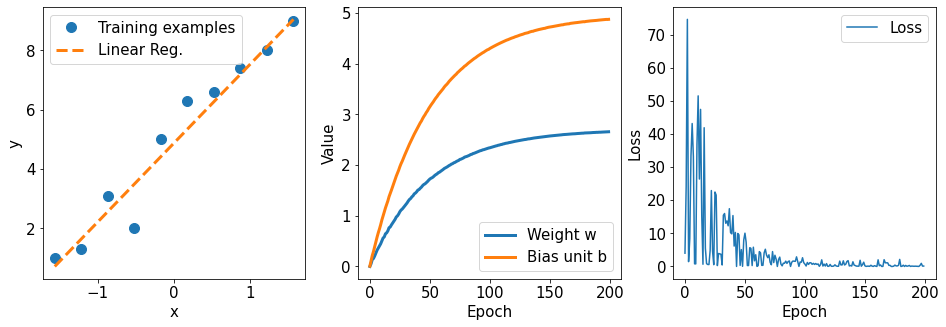

In [ ]:
#확인
print('최종 파라미터:', model.w.numpy(), model.b.numpy())

X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(1, 3, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)


ax = fig.add_subplot(1, 3, 3)
plt.plot(range(len(Ls)), Ls)
plt.legend(['Loss'], fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# plt.savefig('images/13_6.png', dpi=300)
plt.show()

## 2.3. 케라스 API 사용

#### 2.3.1. 모델 설정

In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.Sequential()

In [3]:
model.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [4]:
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [5]:
model.build(input_shape=(None, 4))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 모델의 레이어 출력
for l in model.layers:
    print(l.name, l.units, l.input_shape, l.output_shape)

dense 16 (None, 4) (None, 16)
dense_1 32 (None, 16) (None, 32)


In [8]:
## 모델의 변수 출력
for v in model.variables:
    print(v.name, v.trainable, v.shape)

dense/kernel:0 True (4, 16)
dense/bias:0 True (16,)
dense_1/kernel:0 True (16, 32)
dense_1/bias:0 True (32,)


#### 2.3.2. 레이어 설정

* `tf.keras.activations`에서 활성화 함수를 선택하기: https://www.tensorflow.org/api_docs/python/tf/keras/activations
* `tf.keras.initializers`로 층의 파라미터 초기화하기: https://www.tensorflow.org/api_docs/python/tf/keras/initializers
* `tf.keras.regularizers`로 (과대적합을 막기 위해) 층의 파라미터에 규제 적용하기: https://www.tensorflow.org/api_docs/python/tf/keras/regularizers

In [9]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=16, 
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        bias_initializer=tf.keras.initializers.Constant(2.0)
    ))

model.add(
    tf.keras.layers.Dense(
        units=32, 
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer=tf.keras.regularizers.l1
    ))

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


#### 2.3.3. 모델 컴파일

* `tf.keras.optimizers`에 있는 옵티마이저: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
* `tf.keras.losses`에 있는 손실 함수: https://www.tensorflow.org/api_docs/python/tf/keras/losses
* `tf.keras.metrics`에 있는 성능 지표: https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(), 
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall(),])

### 2.3.4. 모델 학습

In [21]:
model.fit(x=x_train, 
          y=y_train, 
          validation_data=(x_valid, y_valid), 
          epochs=200, 
          batch_size=2)

Epoch 1/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6859 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6859 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6859 - binary_accuracy: 0.6300 - val_loss: 0.6791 - val_binary_accuracy: 0.7000
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6859 - binary_accuracy: 0.6400 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6300 - val_loss: 0.6791 - val_binary_accuracy: 0.7000
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6859 - binary_accuracy: 0.6600 - val_loss: 0.6791 - val_binary_accuracy: 0.7000
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - los

### 2.3.4. XOR 분류 문제 풀어보기

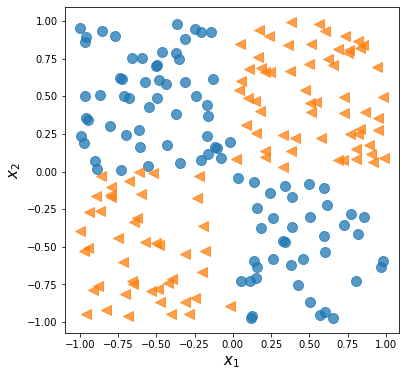

In [16]:
#데이터 준비

tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
# plt.savefig('images/14_1.png', dpi=300)
plt.show()

In [17]:
#모델 설정 - 단층 퍼셉트론
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, 
                                activation='sigmoid'))

model.build(input_shape=(None ,2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


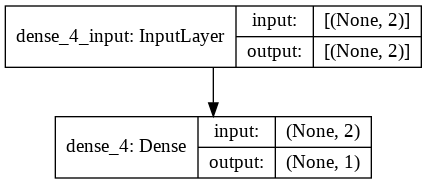

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [19]:
#모델 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [20]:
#모델 학습
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=100, batch_size=2)

Epoch 1/100
50/50 [==============================] - 3s 5ms/step - loss: 0.8157 - binary_accuracy: 0.4600 - val_loss: 0.8071 - val_binary_accuracy: 0.4800
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.8068 - binary_accuracy: 0.4600 - val_loss: 0.7986 - val_binary_accuracy: 0.4800
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7984 - binary_accuracy: 0.4500 - val_loss: 0.7906 - val_binary_accuracy: 0.4800
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7905 - binary_accuracy: 0.4600 - val_loss: 0.7830 - val_binary_accuracy: 0.4800
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7832 - binary_accuracy: 0.4500 - val_loss: 0.7760 - val_binary_accuracy: 0.4900
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7762 - binary_accuracy: 0.4500 - val_loss: 0.7693 - val_binary_accuracy: 0.4900
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - los

In [22]:
hist.params

{'epochs': 100, 'steps': 50, 'verbose': 1}

In [23]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


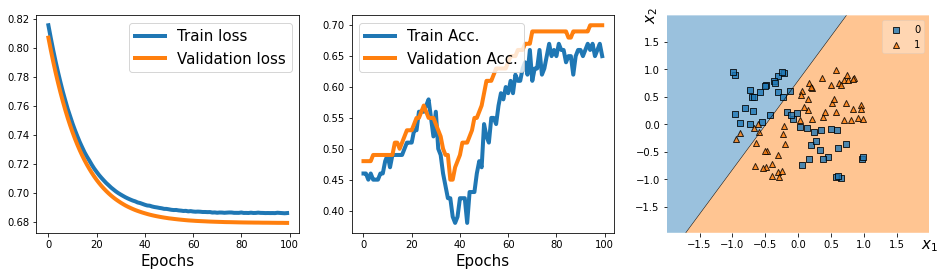

In [24]:
#결과 확인
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_2.png', dpi=300)
plt.show()

In [25]:
#모델 설정 - 다층 퍼셉트론
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.build(input_shape=(None ,2))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


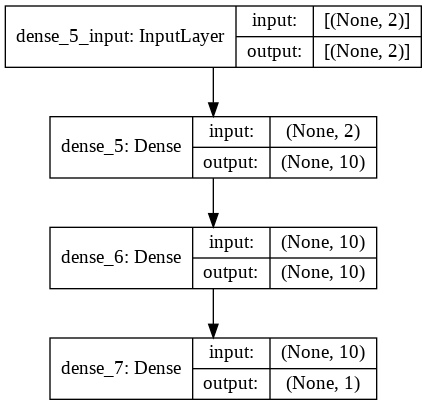

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [27]:
#모델 컴파일:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

#모델 학습:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=100, batch_size=2)

Epoch 1/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6945 - binary_accuracy: 0.5200 - val_loss: 0.6832 - val_binary_accuracy: 0.6300
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6820 - binary_accuracy: 0.5900 - val_loss: 0.6736 - val_binary_accuracy: 0.7100
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6725 - binary_accuracy: 0.6700 - val_loss: 0.6648 - val_binary_accuracy: 0.7300
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_accuracy: 0.7000 - val_loss: 0.6577 - val_binary_accuracy: 0.7000
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6577 - binary_accuracy: 0.7100 - val_loss: 0.6518 - val_binary_accuracy: 0.7000
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6518 - binary_accuracy: 0.7400 - val_loss: 0.6464 - val_binary_accuracy: 0.7300
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


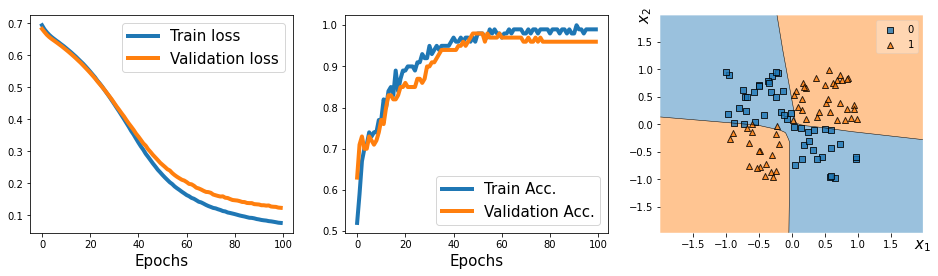

In [28]:
#결과 확인
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_3.png', dpi=300)
plt.show()

### 2.3.5. 함수형 API로 모델 설정

In [91]:
## 입력층
inputs = tf.keras.Input(shape=(2,))

## 은닉층
h1 = tf.keras.layers.Dense(units=10, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=10, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=5, activation='relu')(h2)

## 출력층
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

## 모델 만들기
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_84 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_85 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_86 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 6         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


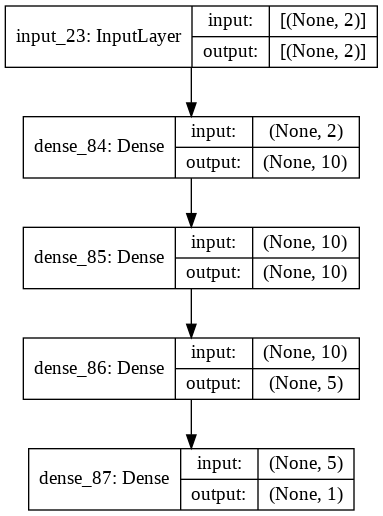

In [92]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [93]:
#모델 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

#모델 학습
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=100, batch_size=2, verbose=1)


Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 0.6903 - binary_accuracy: 0.5400 - val_loss: 0.6754 - val_binary_accuracy: 0.5500
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6656 - binary_accuracy: 0.5500 - val_loss: 0.6597 - val_binary_accuracy: 0.6400
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6496 - binary_accuracy: 0.6500 - val_loss: 0.6469 - val_binary_accuracy: 0.6100
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6353 - binary_accuracy: 0.6200 - val_loss: 0.6343 - val_binary_accuracy: 0.6400
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6198 - binary_accuracy: 0.6700 - val_loss: 0.6215 - val_binary_accuracy: 0.6500
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6031 - binary_accuracy: 0.6700 - val_loss: 0.6069 - val_binary_accuracy: 0.6900
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


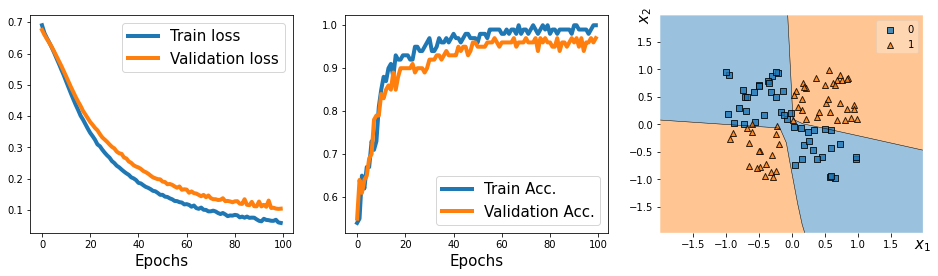

In [94]:
#결과 확인
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

# [3] 케라스를 활용하여 패션 아이템 분류해보기

## 2.1. Fashion_MNIST 데이터 로딩

In [110]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [111]:
#데이터 크기 확인
X_train_full.shape

(60000, 28, 28)

In [112]:
#훈련, 검증, 테스트 데이터 나누기 및 준비
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [113]:
#클래스 확인
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names)

[4 0 7 ... 3 0 5]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


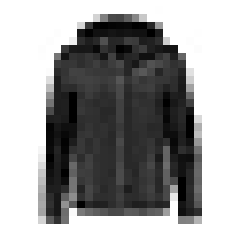

Coat


In [114]:
#이미지 확인
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
print(class_names[y_train[0]])

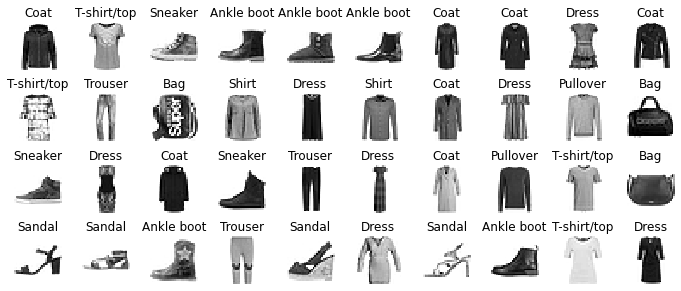

In [115]:
#샘플 이미지 확인
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.2. 케라스로 모델 구현 및 실험

In [389]:
#모델 선언 - 방법1
# Flatten - 평탄화

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(600, activation="relu"))
model.add(tf.keras.layers.Dense(320, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [369]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_51 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_277 (Dense)            (None, 600)               471000    
_________________________________________________________________
dense_278 (Dense)            (None, 300)               180300    
_________________________________________________________________
dense_279 (Dense)            (None, 150)               45150     
_________________________________________________________________
dense_280 (Dense)            (None, 80)                12080     
_________________________________________________________________
dense_281 (Dense)            (None, 10)                810       
Total params: 709,340
Trainable params: 709,340
Non-trainable params: 0
_______________________________________________

In [169]:
# 모델 선언 - 방법2
# Flatten - 평탄화

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), 
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_89 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_90 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


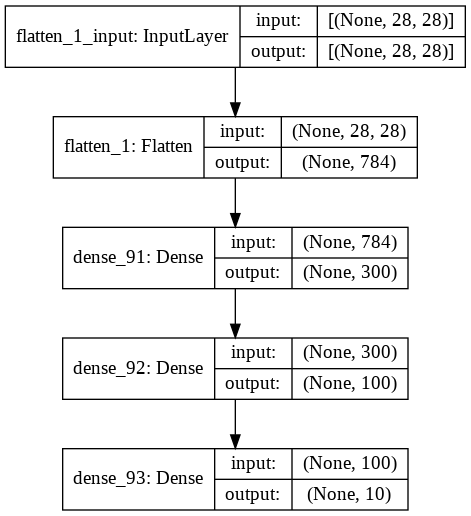

In [118]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [119]:
model.layers

In [120]:
hidden1 = model.layers[1]
hidden1.name

'dense_91'

In [121]:
model.get_layer(hidden1.name) is hidden1

True

In [122]:
weights, biases = hidden1.get_weights()

In [123]:
weights

array([[ 0.02780286, -0.01737082,  0.05283122, ...,  0.01326582,
        -0.04877683, -0.0646891 ],
       [ 0.0383872 ,  0.04782246, -0.05928672, ...,  0.04902782,
         0.03093047,  0.02601052],
       [ 0.0291671 ,  0.06915198, -0.07336355, ..., -0.02335422,
         0.05677426,  0.05816698],
       ...,
       [ 0.00828276,  0.02081989,  0.03768931, ...,  0.02036224,
        -0.05947227, -0.02291539],
       [-0.01108652,  0.00173627, -0.02804857, ..., -0.04047594,
        -0.06132833,  0.07259169],
       [-0.05946248,  0.00716308,  0.06041209, ..., -0.05490974,
        -0.06512545,  0.00675188]], dtype=float32)

In [124]:
weights.shape

(784, 300)

In [125]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [126]:
biases.shape

(300,)

In [390]:
#모델 컴파일
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
#모델 학습
history = model.fit(X_train, y_train, epochs=9,
                    validation_data=(X_valid, y_valid))

Epoch 1/9
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6904 - accuracy: 0.7686 - val_loss: 0.4912 - val_accuracy: 0.8272
Epoch 2/9
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4539 - accuracy: 0.8397 - val_loss: 0.3995 - val_accuracy: 0.8636
Epoch 3/9
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4034 - accuracy: 0.8558 - val_loss: 0.3897 - val_accuracy: 0.8612
Epoch 4/9
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8666 - val_loss: 0.3538 - val_accuracy: 0.8708
Epoch 5/9
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3513 - accuracy: 0.8732 - val_loss: 0.3567 - val_accuracy: 0.8704
Epoch 6/9
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8785 - val_loss: 0.3323 - val_accuracy: 0.8816
Epoch 7/9
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3181 - accuracy: 0.8841 - val_loss: 0.3451 - val_accuracy: 0.8698

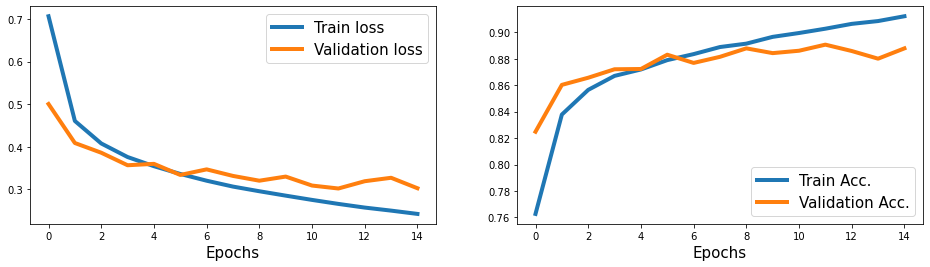

In [378]:
#결과 확인
hist_out = history.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(hist_out['loss'], lw=4)
plt.plot(hist_out['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(hist_out['accuracy'], lw=4)
plt.plot(hist_out['val_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()

In [391]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print("loss: ",loss)
print("accuracy: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8759
loss:  0.34783610701560974
accuracy:  0.8758999705314636


In [132]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [133]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [134]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [135]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

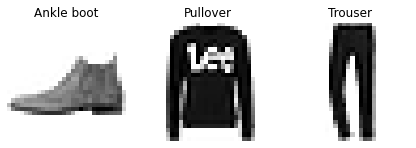

In [136]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()